<a href="https://colab.research.google.com/github/MohammadAliAfsahi/YapAiTek-assignment/blob/master/YapAiTek_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import learning_curve
from sklearn import model_selection

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import losses
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/YapAiTek assignment/data.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/YapAiTek assignment/test.csv')

In [0]:
data.head()

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 20 columns):
Unnamed: 0                                616656 non-null int64
Episode                                   616656 non-null object
Station                                   616656 non-null object
Channel Type                              616656 non-null object
Season                                    616656 non-null object
Year                                      616656 non-null int64
Date                                      616656 non-null object
Day of week                               616656 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616656 non-null int64
Name of show                              616656 non-null object
Name of episode                           394077 non-null object
Genre                                     61665

In [0]:
data.isna().sum()

Unnamed: 0                                     0
Episode                                        0
Station                                        0
Channel Type                                   0
Season                                         0
Year                                           0
Date                                           0
Day of week                                    0
Start_time                                    43
End_time                                      43
Length                                         0
Name of show                                   0
Name of episode                           222579
Genre                                          0
First time or rerun                            0
# of episode in the season                     0
Movie?                                         0
Game of the Canadiens during episode?          0
Market Share_total                             0
Temperature in Montreal during episode     83344
dtype: int64

In [0]:
data['Market Share_total'].describe()

count    616656.000000
mean          3.011562
std           4.919562
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: Market Share_total, dtype: float64

In [0]:
data['Station'].value_counts()

Teletoon Fr.+                          50750
Unis TV+                               46318
TQ Total                               44150
RDI+                                   40490
SRC Total                              37582
TV5+                                   29974
Z+                                     29715
Historia+                              29267
MusiquePlus+ (retired Aug 25, 2019)    27555
Canal Vie+                             27528
Canal D+                               26075
MAX+                                   24418
ARTV+                                  24298
VRAK+                                  23903
Evasion+                               23508
TVA Total                              21834
Series++                               21575
V Total                                21289
RDS2+                                  19075
LCN+                                   17536
RDS+                                   17468
Meteomedia+                            10524
PYC Online

In [0]:
data['Channel Type'].value_counts()

Specialty Channel    535951
General Channel       80705
Name: Channel Type, dtype: int64

In [0]:
data['Season'].value_counts()

Fall      234291
Winter    195257
Summer    127457
Spring     59651
Name: Season, dtype: int64

In [0]:
data['Year'].value_counts()

2018    260132
2017    255214
2016     75849
2019     25461
Name: Year, dtype: int64

In [0]:
data['Day of week'].value_counts()

Wednesday    89748
Tuesday      89058
Friday       88795
Monday       88597
Thursday     88507
Saturday     86604
Sunday       85347
Name: Day of week, dtype: int64

In [0]:
data['Length'].value_counts()

2     266631
4     170233
0      60086
1      55190
3      14709
8      13347
6       8766
12      4043
7       3542
28      3534
10      3160
16      2852
5       2251
84      1752
9       1557
14      1522
24       937
11       778
15       691
13       516
18       219
20       118
26        46
17        41
22        40
19        26
21        26
23        16
30         7
25         3
32         3
36         3
27         2
34         2
40         2
80         2
38         1
39         1
92         1
Name: Length, dtype: int64

In [0]:
data['Genre'].value_counts()

Animated Television Programs & Films                          88880
Ongoing Dramatic Series                                       79219
Reality Programs                                              72861
News                                                          71121
Long-form Documentary                                         50520
Informal Education and Recreation and Leisure                 44804
General Entertainment and Human Interest                      37275
Professional Sports                                           30871
Theatre Feature Films Aired on TV                             20682
Interstitial                                                  20000
Analysis and Interpretation                                   18353
Ongoing Comedy Series (Sitcoms)                               14366
Game Shows                                                    11809
Music Video Programs                                          11227
Infomercials, Promotional and Corporate Videos  

In [0]:
data['# of episode in the season'].value_counts()

Yes    606002
No      10654
Name: # of episode in the season, dtype: int64

In [34]:
# No Idea how it can help... 
data['Temperature in Montreal during episode'].describe()

count    616613.000000
mean          6.707370
std          11.326032
min         -27.425000
25%          -0.325000
50%           6.707000
75%          15.575000
max          34.950000
Name: Temperature in Montreal during episode, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  166.,   547.,   996.,  1759.,  1748.,  2368.,  2286.,  3085.,
         4094.,  5279.,  5478.,  6856.,  8184.,  9441., 10379., 11984.,
         9876., 10570., 14083., 12911., 16133., 22703., 27470., 23802.,
        20571., 17800., 14081., 14431., 14185., 15276., 13597., 15292.,
        16241., 17185., 17155., 18262., 18677., 19120., 18058., 18246.,
        14543., 12545.,  9916.,  6666.,  4514.,  2148.,  1423.,   589.,
          463.,   130.]),
 array([-2.74250e+01, -2.61775e+01, -2.49300e+01, -2.36825e+01,
        -2.24350e+01, -2.11875e+01, -1.99400e+01, -1.86925e+01,
        -1.74450e+01, -1.61975e+01, -1.49500e+01, -1.37025e+01,
        -1.24550e+01, -1.12075e+01, -9.96000e+00, -8.71250e+00,
        -7.46500e+00, -6.21750e+00, -4.97000e+00, -3.72250e+00,
        -2.47500e+00, -1.22750e+00,  2.00000e-02,  1.26750e+00,
         2.51500e+00,  3.76250e+00,  5.01000e+00,  6.25750e+00,
         7.50500e+00,  8.75250e+00,  1.00000e+01,  1.12475e+01,
         1.24950e+01,  1.37425

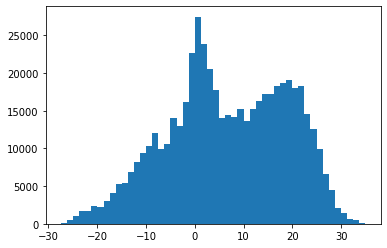

In [7]:
plt.hist(data['Temperature in Montreal during episode'], bins=50)

In [0]:
# fill nan values in temerature column with mean...
# Also MinMax normalization with range between (-1, 1) is used...
value = {'Temperature in Montreal during episode': round(data['Temperature in Montreal during episode'].mean(), 3)}
data.fillna(value=value, inplace=True)

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
t = scaler.fit_transform(data[['Temperature in Montreal during episode']])
data[['Temperature in Montreal during episode']] = t

In [0]:
# convert start time and end time to timestamp and extract time from them 
# then in the following I will label each time of day
#
# Start time and End time both could effect the result, because time of show can effect the viewers!
# couldn't fill nan values in start time and end time, because mode of these two columns are same and mean has no meaning...
# so nan values is droped in these two columns

data['Start_time'] = pd.to_datetime(data['Start_time'])
data['End_time'] = pd.to_datetime(data['End_time'])
data['Start_time'] = data['Start_time'].dt.time
data['End_time'] = data['End_time'].dt.time

data.dropna(axis=0, subset=['Start_time', ], inplace=True)

In [0]:
def parse(y):
  if y < 23.59:
    return datetime.datetime.strptime(str(y), '%H').time()
  else:
    return datetime.datetime.strptime('23:59', '%H:%M').time()

def f(x):
  try:
    if (x > parse(4)) and (x <= parse(8)):
        return 'Early Morning'
    elif (x > parse(8)) and (x <= parse(12) ):
        return 'Morning'
    elif (x > parse(12)) and (x <= parse(16)):
        return'Noon'
    elif (x > parse(16)) and (x <= parse(20)) :
        return 'Eve'
    elif (x > parse(20)) and (x <= parse(23.59)):
        return'Night'
    elif (x <= parse(4)):
        return'Late Night'
  except:
    print(x)

data['Part of Day'] = data['Start_time'].apply(f)

In [8]:
data['Part of Day'].isna().sum()

0

In [0]:
data['Name of show'].value_counts()

Complément de programme canadien                           9414
Buzz                                                       8551
Un souper presque parfait                                  6714
Complément de programme                                    5359
LCN/MAINTENANT                                             4777
                                                           ... 
SP Jean-Marc Fournier à Ottawa                                1
SP 100e anniversaire de l'Armistice                           1
Auto Formule 1: Sur la Ligne de Départ GP du Canada - R       1
SP:Améliorer le système de santé                              1
Mickey Noël merveill                                          1
Name: Name of show, Length: 6687, dtype: int64

In [144]:
data.columns

Index(['Unnamed: 0', 'Episode', 'Station', 'Channel Type', 'Season', 'Year',
       'Date', 'Day of week', 'Start_time', 'End_time', 'Length',
       'Name of show', 'Name of episode', 'Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?', 'Market Share_total',
       'Temperature in Montreal during episode', 'Part of Day'],
      dtype='object')

In [0]:
# Features
columns = ['Station', 'Channel Type', 'Season', 'Day of week', 'Length','Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?', 'Market Share_total', 'Temperature in Montreal during episode', 'Part of Day']

In [0]:
for i, element in enumerate(columns):
  print (i, element)

0 Station
1 Channel Type
2 Season
3 Day of week
4 Length
5 Genre
6 First time or rerun
7 # of episode in the season
8 Movie?
9 Game of the Canadiens during episode?
10 Market Share_total


In [0]:
data.shape

(616656, 20)

In [10]:
# preprocessing
c = [element focr i, element in enumerate(columns) if element != 'Market Share_total']
X = data[c]
Y = data['Market Share_total']
print("data shape: \t", data.shape, ", X shape: \t", X.shape, "\t, Y shape: \t", Y.shape)

data shape: 	 (616613, 21) , X shape: 	 (616613, 12) 	, Y shape: 	 (616613,)


In [11]:
#Label Encoder. In order to be able to get real classes back I didn't use for loop!
le0 = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()
le8 = preprocessing.LabelEncoder()
le9 = preprocessing.LabelEncoder()

X['Station'] = le0.fit_transform(X['Station'])
X['Channel Type'] = le1.fit_transform(X['Channel Type'])
X['Season'] = le2.fit_transform(X['Season'])
X['Day of week'] = le3.fit_transform(X['Day of week'])
X['Genre'] = le4.fit_transform(X['Genre'])
X['First time or rerun'] = le5.fit_transform(X['First time or rerun'])
X['# of episode in the season'] = le6.fit_transform(X['# of episode in the season'])
X['Movie?'] = le7.fit_transform(X['Movie?'])
X['Game of the Canadiens during episode?'] = le8.fit_transform(X['Game of the Canadiens during episode?'])
X['Part of Day'] = le9.fit_transform(X['Part of Day'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [148]:
X.head()

,Station,Channel Type,Season,Day of week,Length,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode,Part of Day
0,21,0,0,1,8,11,0,1,0,0,0.533467,0
1,21,0,0,1,2,8,0,1,0,0,0.492585,0
2,21,0,0,1,2,7,0,1,0,0,0.492585,3
3,21,0,0,1,4,14,0,1,0,0,0.460521,3
4,21,0,0,1,2,20,0,1,0,0,0.464529,3


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
# this has the least loss and mae among following alogrithm...
est = MLPRegressor(hidden_layer_sizes=(100, 100, 100), alpha= 0.001,
                                 early_stopping=True)
est.fit(X_train, Y_train)
y_pred = est.predict(X_test)
print("Loss: ", est.loss_, "mae: ", mean_absolute_error(Y_test, y_pred), "R^2 Score: ", est.score(X_test, Y_test))

Loss:  1.962956010498638 mae:  1.252739841082565 R^2 Score:  0.8307664932680544


In [23]:
test.isna().sum()

Unnamed: 0                                    0
Episode                                       0
Station                                       0
Channel Type                                  0
Season                                        0
Year                                          0
Date                                          0
Day of week                                   0
Start_time                                   22
End_time                                     22
Length                                        0
Name of show                                  0
Name of episode                           30619
Genre                                         0
First time or rerun                           0
# of episode in the season                    0
Movie?                                        0
Game of the Canadiens during episode?         0
Temperature in Montreal during episode    23229
dtype: int64

In [32]:
# fill nan values in temerature column with mean...
# Also MinMax normalization with range between (-1, 1) is used...
value = {'Temperature in Montreal during episode': round(test['Temperature in Montreal during episode'].mean(), 3)}
test.fillna(value=value, inplace=True)

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
t = scaler.fit_transform(test[['Temperature in Montreal during episode']])
test[['Temperature in Montreal during episode']] = t


# convert start time and end time to timestamp and extract time from them 
# then in the following I will label each time of day
#
# Start time and End time both could effect the result, because time of show can effect the viewers!
# couldn't fill nan values in start time and end time, because mode of these two columns are same and mean has no meaning...
# so nan values is droped in these two columns

test['Start_time'] = pd.to_datetime(test['Start_time'])
test['End_time'] = pd.to_datetime(test['End_time'])
test['Start_time'] = test['Start_time'].dt.time
test['End_time'] = test['End_time'].dt.time

test.dropna(axis=0, subset=['Start_time', ], inplace=True)

def parse(y):
  if y < 23.59:
    return datetime.datetime.strptime(str(y), '%H').time()
  else:
    return datetime.datetime.strptime('23:59', '%H:%M').time()

def f(x):
  try:
    if (x > parse(4)) and (x <= parse(8)):
        return 'Early Morning'
    elif (x > parse(8)) and (x <= parse(12) ):
        return 'Morning'
    elif (x > parse(12)) and (x <= parse(16)):
        return'Noon'
    elif (x > parse(16)) and (x <= parse(20)) :
        return 'Eve'
    elif (x > parse(20)) and (x <= parse(23.59)):
        return'Night'
    elif (x <= parse(4)):
        return'Late Night'
  except:
    print(x)

test['Part of Day'] = test['Start_time'].apply(f)

# preprocessing
c = [element for i, element in enumerate(columns) if element != 'Market Share_total']
X_t = test[c]

print("data shape: \t", test.shape, ", X shape: \t", X_t.shape)

#Label Encoder. In order to be able to get real classes back I didn't use for loop!
le = preprocessing.LabelEncoder()


X_t['Station'] = le.fit_transform(X_t['Station'])
X_t['Channel Type'] = le.fit_transform(X_t['Channel Type'])
X_t['Season'] = le.fit_transform(X_t['Season'])
X_t['Day of week'] = le.fit_transform(X_t['Day of week'])
X_t['Genre'] = le.fit_transform(X_t['Genre'])
X_t['First time or rerun'] = le.fit_transform(X_t['First time or rerun'])
X_t['# of episode in the season'] = le.fit_transform(X_t['# of episode in the season'])
X_t['Movie?'] = le.fit_transform(X_t['Movie?'])
X_t['Game of the Canadiens during episode?'] = le.fit_transform(X_t['Game of the Canadiens during episode?'])
X_t['Part of Day'] = le.fit_transform(X_t['Part of Day'])

data shape: 	 (154143, 20) , X shape: 	 (154143, 12)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [0]:
test['Market Share_total'] = est.predict(X_t)

In [38]:
test['Market Share_total'].head()

0    0.254797
1    0.256597
2    0.343051
3    0.802928
4    0.290408
Name: Market Share_total, dtype: float64

In [37]:
test['Market Share_total'].describe()

count    154143.000000
mean          3.120796
std           4.122642
min          -1.330530
25%           0.921174
50%           1.911779
75%           3.426462
max          42.523844
Name: Market Share_total, dtype: float64